Average Recursive Calls per k:
 k  SplitCalls  ChenCalls
 4         825        828
 5        2192       2293
 8       32855      37922
 9      120131     140717
10      242814     311285
13     1431853    1860651
14     1904808    3101411


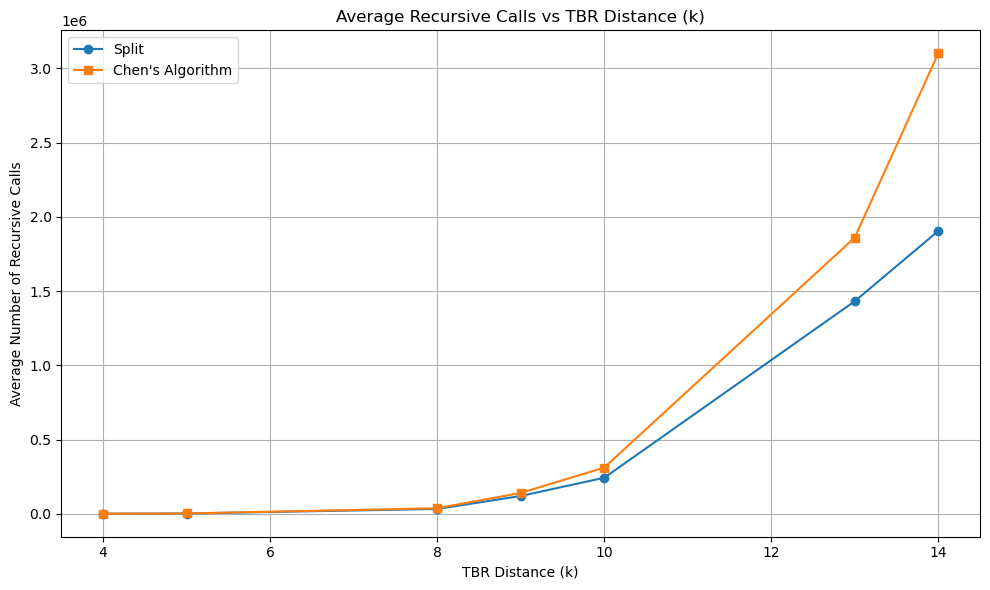

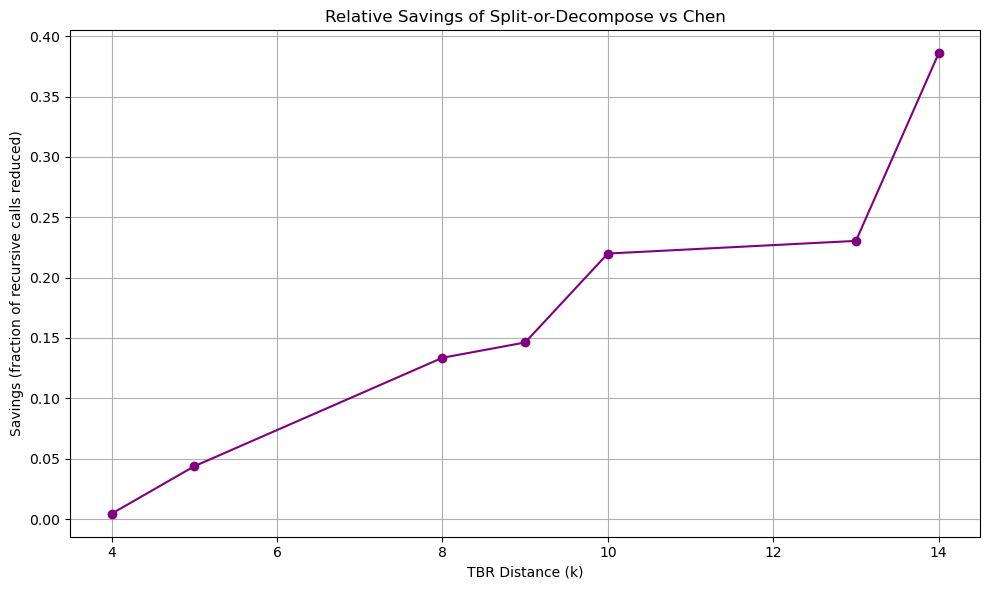

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your raw results
data = []
with open("results.txt") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:
            k, split, chen = map(int, parts)
            data.append((k, split, chen))

df = pd.DataFrame(data, columns=["k", "SplitCalls", "ChenCalls"])

grouped = df.groupby("k").mean(numeric_only=True).reset_index()

# Round and cast to int for printing
grouped_print = grouped.copy()
grouped_print[["SplitCalls", "ChenCalls"]] = (
    grouped_print[["SplitCalls", "ChenCalls"]].round(0).astype("int64")
)

print("Average Recursive Calls per k:")
print(grouped_print.to_string(index=False))

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped["k"], grouped["SplitCalls"], marker='o', label="Split")
plt.plot(grouped["k"], grouped["ChenCalls"], marker='s', label="Chen's Algorithm")

plt.title("Average Recursive Calls vs TBR Distance (k)")
plt.xlabel("TBR Distance (k)")
plt.ylabel("Average Number of Recursive Calls")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute relative savings
grouped["Savings"] = 1 - grouped["SplitCalls"] / grouped["ChenCalls"]

plt.figure(figsize=(10, 6))
plt.plot(grouped["k"], grouped["Savings"], marker="o", color="purple")
plt.title("Relative Savings of Split-or-Decompose vs Chen")
plt.xlabel("TBR Distance (k)")
plt.ylabel("Savings (fraction of recursive calls reduced)")
plt.grid(True)
plt.tight_layout()
plt.show()




Average Recursive Calls per k:
 k    SplitCalls     ChenCalls
 4    689.714286    781.000000
 5   2133.224490   2282.091837
 8  37750.000000  37922.000000
 9 138605.416667 140716.666667
10 223009.444444 229006.000000


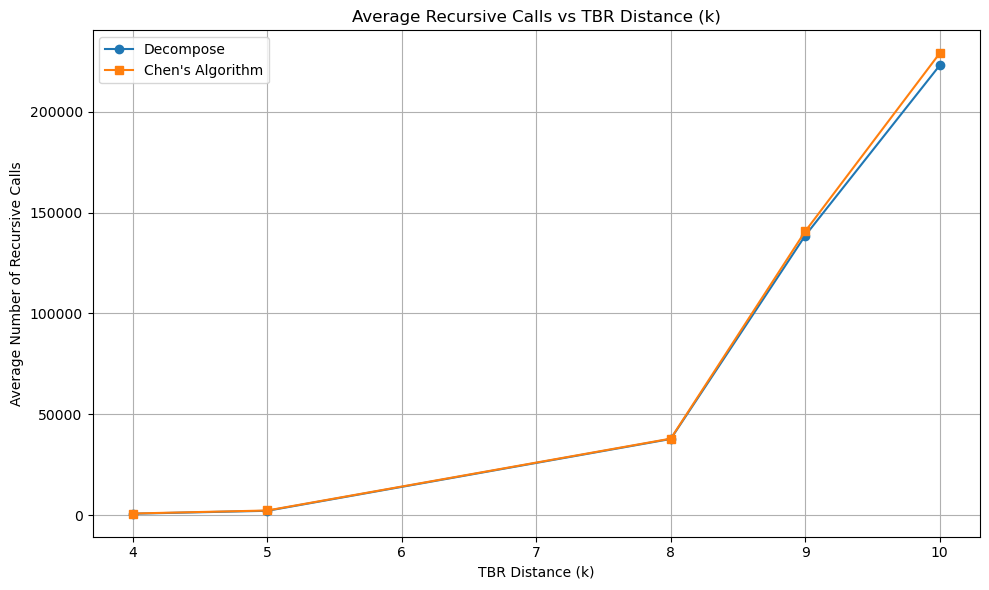

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your raw results
data = []
with open("fourth.txt") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:
            k, split, chen = map(int, parts)
            data.append((k, split, chen))

df = pd.DataFrame(data, columns=["k", "SplitCalls", "ChenCalls"])

# Group by k and take the mean
grouped = df.groupby("k").mean().reset_index()

# Print the averages
print("Average Recursive Calls per k:")
print(grouped.to_string(index=False))

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped["k"], grouped["SplitCalls"], marker='o', label="Decompose")
plt.plot(grouped["k"], grouped["ChenCalls"], marker='s', label="Chen's Algorithm")

plt.title("Average Recursive Calls vs TBR Distance (k)")
plt.xlabel("TBR Distance (k)")
plt.ylabel("Average Number of Recursive Calls")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



      k    Split     Chen  Improvement (%)
0     4      484      496         2.419355
1     4      788      858         8.158508
2     4      352      358         1.675978
3     4      921      876        -5.136986
4     4      648      660         1.818182
..   ..      ...      ...              ...
145  13   509905  1035834        50.773483
146  13  1691235  2172521        22.153342
147  13  2257476  2362208         4.433649
148  14  2257602  3963500        43.040192
149  14  1552015  2239322        30.692638

[150 rows x 4 columns]
Average Improvement (%): 9.117697777757137


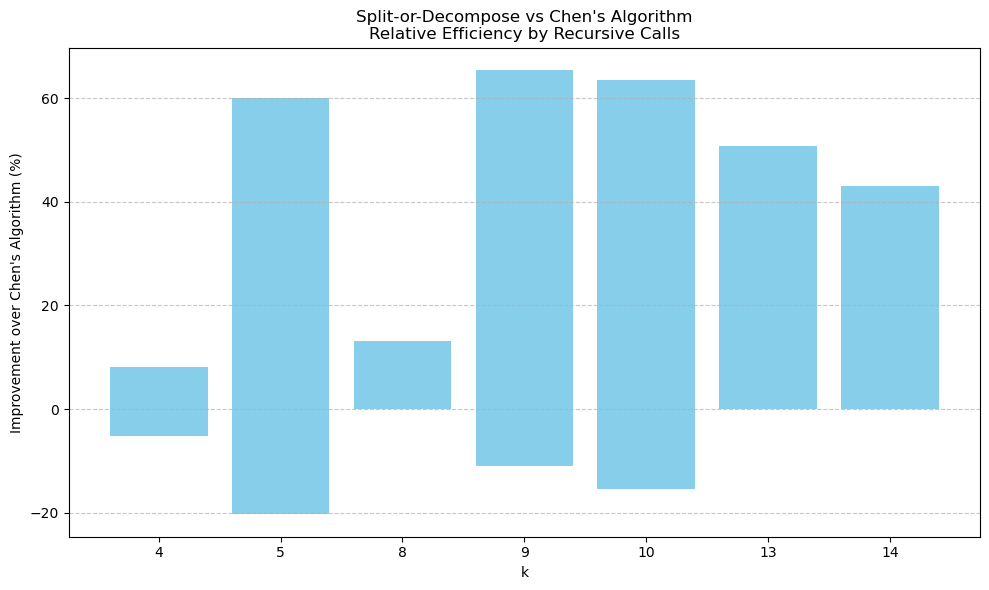

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the TXT file
filename = "results.txt"  # Change this to your actual file path

# Step 2: Load the data assuming space-separated values
df = pd.read_csv(filename, sep="\s+", header=None, names=["k", "Split", "Chen"])

# Step 3: Calculate % improvement
df["Improvement (%)"] = ((df["Chen"] - df["Split"]) / df["Chen"]) * 100


print(df)
print("Average Improvement (%):", df["Improvement (%)"].mean())

# Step 4: Plot the improvement
plt.figure(figsize=(10, 6))
plt.bar(df["k"].astype(str), df["Improvement (%)"], color="skyblue")
plt.xlabel("k")
plt.ylabel("Improvement over Chen's Algorithm (%)")
plt.title("Split-or-Decompose vs Chen's Algorithm\nRelative Efficiency by Recursive Calls")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



Estimated complexity:
Split-or-Decompose: O(2.38^k)
Chen's Algorithm:   O(2.48^k)


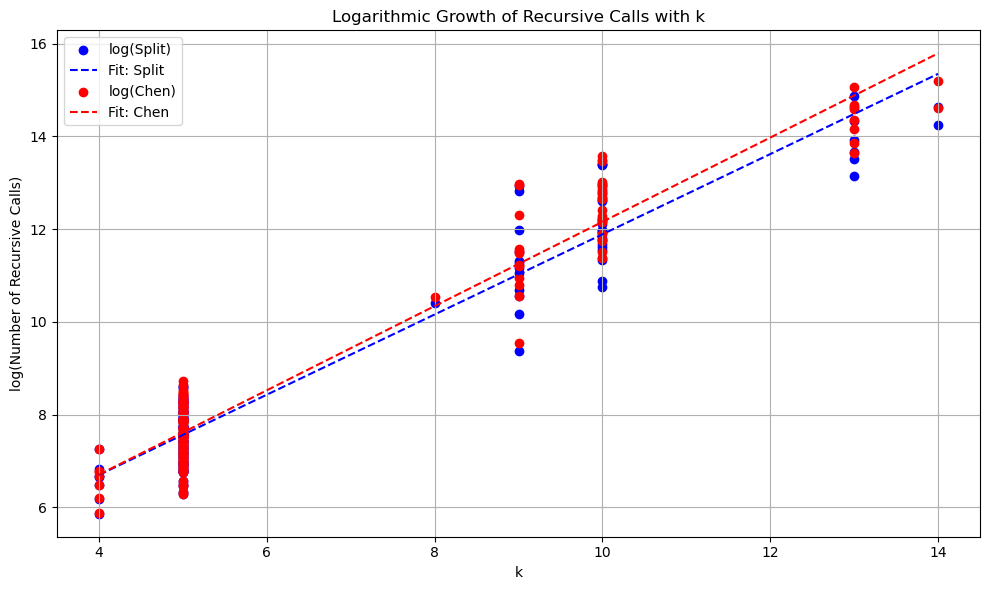

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the file
df = pd.read_csv("results.txt", sep="\s+", header=None, names=["k", "Split", "Chen"])

# Log-transform recursive calls
df["log_Split"] = np.log(df["Split"])
df["log_Chen"] = np.log(df["Chen"])

# Fit linear regression: log(Split) vs k, log(Chen) vs k
X = df["k"].values.reshape(-1, 1)
split_model = LinearRegression().fit(X, df["log_Split"])
chen_model = LinearRegression().fit(X, df["log_Chen"])

# Get exponential bases: RecursiveCalls ≈ a * b^k → log ≈ log(a) + k * log(b)
split_growth_base = np.exp(split_model.coef_[0])
chen_growth_base = np.exp(chen_model.coef_[0])

print("Estimated complexity:")
print(f"Split-or-Decompose: O({split_growth_base:.2f}^k)")
print(f"Chen's Algorithm:   O({chen_growth_base:.2f}^k)")

# Plot log curves for visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(df["k"], df["log_Split"], label="log(Split)", color='blue')
plt.plot(df["k"], split_model.predict(X), label="Fit: Split", color='blue', linestyle='--')

plt.scatter(df["k"], df["log_Chen"], label="log(Chen)", color='red')
plt.plot(df["k"], chen_model.predict(X), label="Fit: Chen", color='red', linestyle='--')

plt.xlabel("k")
plt.ylabel("log(Number of Recursive Calls)")
plt.title("Logarithmic Growth of Recursive Calls with k")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📈 Split-or-Decompose Model (log-scale):
log(Split) ≈ 1.338 + (1.408)*k + (-0.033)*k²
R²: 0.931

📈 Chen's Algorithm Model (log-scale):
log(Chen) ≈ 1.067 + (1.481)*k + (-0.035)*k²
R²: 0.940


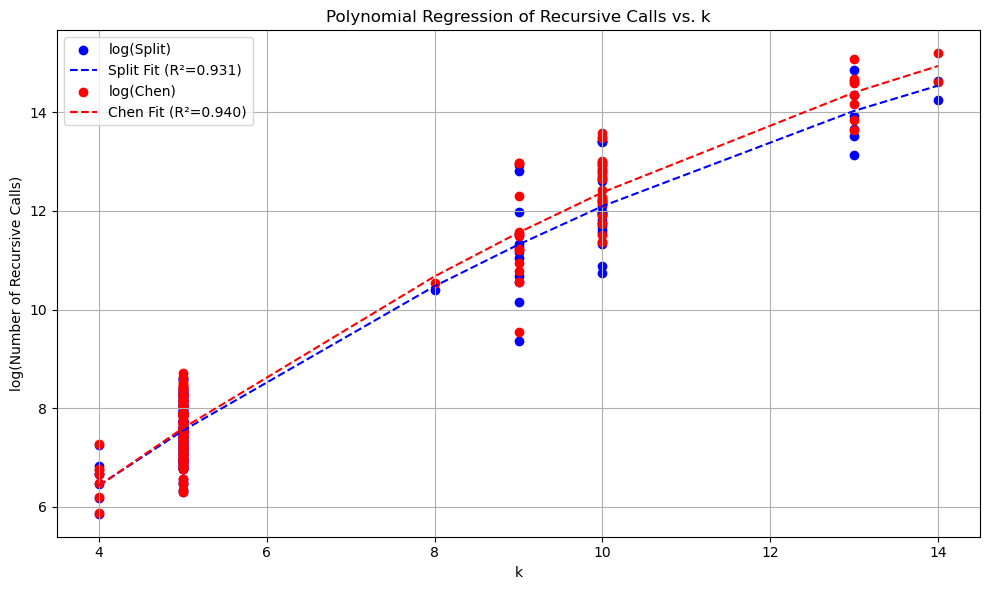

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Step 1: Read from text file
df = pd.read_csv("results.txt", sep="\s+", header=None, names=["k", "Split", "Chen"])

# Step 2: Log-transform recursive call counts
df["log_Split"] = np.log(df["Split"])
df["log_Chen"] = np.log(df["Chen"])

# Step 3: Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[["k"]])  # input is [[k], [k], ...]

# Step 4: Fit polynomial regression models
split_model = LinearRegression().fit(X_poly, df["log_Split"])
chen_model = LinearRegression().fit(X_poly, df["log_Chen"])

# Step 5: Predict and compute R²
df["pred_log_Split"] = split_model.predict(X_poly)
df["pred_log_Chen"] = chen_model.predict(X_poly)

r2_split = r2_score(df["log_Split"], df["pred_log_Split"])
r2_chen = r2_score(df["log_Chen"], df["pred_log_Chen"])

# Step 6: Print model details
print("\n📈 Split-or-Decompose Model (log-scale):")
print(f"log(Split) ≈ {split_model.intercept_:.3f} + ({split_model.coef_[0]:.3f})*k + ({split_model.coef_[1]:.3f})*k²")
print(f"R²: {r2_split:.3f}")

print("\n📈 Chen's Algorithm Model (log-scale):")
print(f"log(Chen) ≈ {chen_model.intercept_:.3f} + ({chen_model.coef_[0]:.3f})*k + ({chen_model.coef_[1]:.3f})*k²")
print(f"R²: {r2_chen:.3f}")

# Step 7: Plot the fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(df["k"], df["log_Split"], label="log(Split)", color='blue')
plt.plot(df["k"], df["pred_log_Split"], label=f"Split Fit (R²={r2_split:.3f})", color='blue', linestyle='--')

plt.scatter(df["k"], df["log_Chen"], label="log(Chen)", color='red')
plt.plot(df["k"], df["pred_log_Chen"], label=f"Chen Fit (R²={r2_chen:.3f})", color='red', linestyle='--')

plt.xlabel("k")
plt.ylabel("log(Number of Recursive Calls)")
plt.title("Polynomial Regression of Recursive Calls vs. k")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



📊 Extrapolated Recursive Calls from k = 15 to 20:
 k  Predicted_Split  Predicted_Chen  Ratio (Chen / Split)
15          6380192        16182343              2.536341
16         18309555        81379092              4.444624
17         57191255       504072659              8.813807
18        194441634      3845761227             19.778486
19        719542931     36139352302             50.225429
20       2898224157    418299443490            144.329569


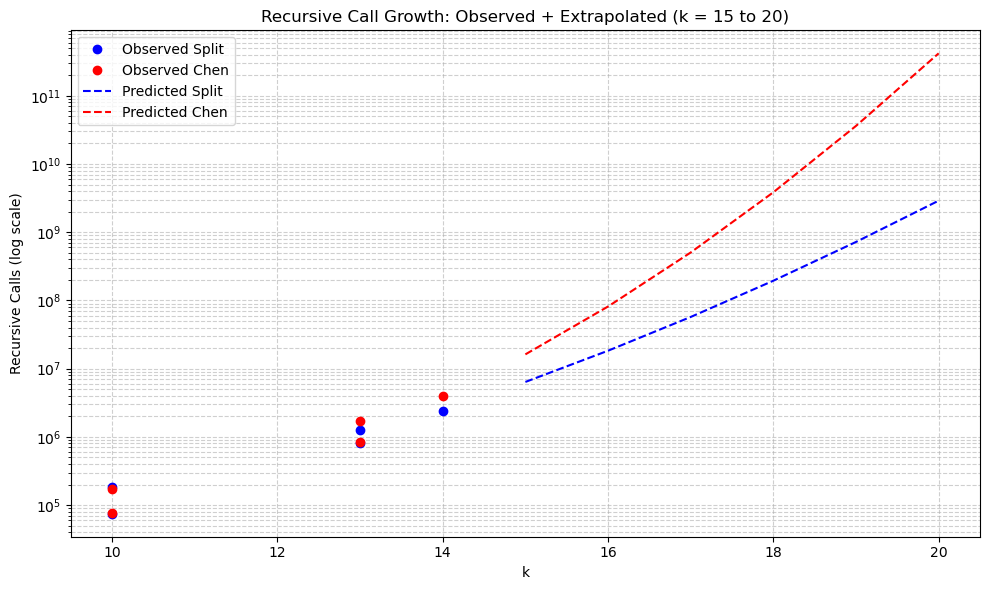

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Input observed data
data = {
    "k": [10, 10, 13, 13, 14],
    "Split": [74719, 182823, 1243627, 802506, 2419901],
    "Chen": [77668, 169197, 1700541, 840743, 3963500]
}
df = pd.DataFrame(data)

# Step 2: Log-transform the recursive call counts
df["log_Split"] = np.log(df["Split"])
df["log_Chen"] = np.log(df["Chen"])

# Step 3: Polynomial fitting (quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[["k"]])

split_model = LinearRegression().fit(X_poly, df["log_Split"])
chen_model = LinearRegression().fit(X_poly, df["log_Chen"])

# Step 4: Predict for k = 15 to 20
k_future = np.arange(15, 21).reshape(-1, 1)
X_future_poly = poly.transform(k_future)

log_split_pred = split_model.predict(X_future_poly)
log_chen_pred = chen_model.predict(X_future_poly)

pred_split = np.exp(log_split_pred)
pred_chen = np.exp(log_chen_pred)

# Step 5: Combine predictions
future_df = pd.DataFrame({
    "k": k_future.flatten(),
    "Predicted_Split": pred_split.astype(int),
    "Predicted_Chen": pred_chen.astype(int),
})
future_df["Ratio (Chen / Split)"] = future_df["Predicted_Chen"] / future_df["Predicted_Split"]

# Step 6: Print table of extrapolated predictions
print("\n📊 Extrapolated Recursive Calls from k = 15 to 20:")
print(future_df.to_string(index=False))

# Step 7: Plot observed + extrapolated values
plt.figure(figsize=(10, 6))

# Observed points
plt.plot(df["k"], df["Split"], "o", label="Observed Split", color="blue")
plt.plot(df["k"], df["Chen"], "o", label="Observed Chen", color="red")

# Extrapolated curves
plt.plot(k_future, pred_split, "--", label="Predicted Split", color="blue")
plt.plot(k_future, pred_chen, "--", label="Predicted Chen", color="red")

plt.yscale("log")
plt.xlabel("k")
plt.ylabel("Recursive Calls (log scale)")
plt.title("Recursive Call Growth: Observed + Extrapolated (k = 15 to 20)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


=== Overlap Count Summary ===
count    105.000000
mean     136.723810
std      137.613764
min        0.000000
25%       42.000000
50%       93.000000
75%      211.000000
max      660.000000
Name: OverlapCount, dtype: float64

=== Average Overlap Count by k ===
k
4     32.166667
5    137.785714
8    660.000000
Name: OverlapCount, dtype: float64


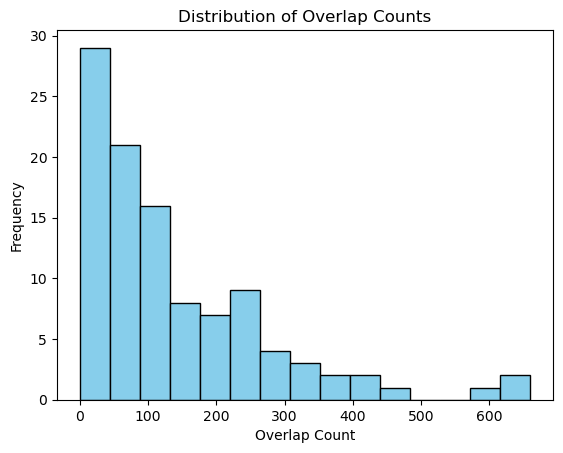

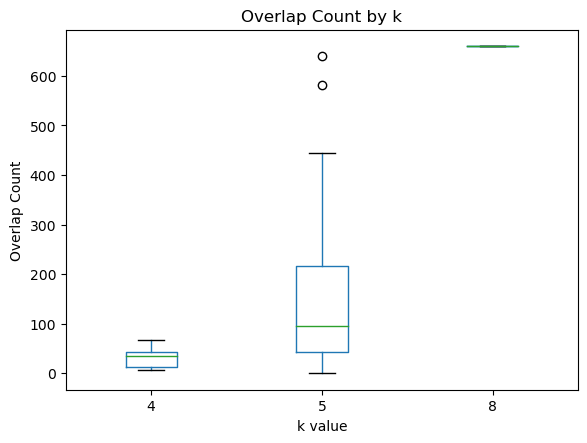

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the txt file (three columns: RecursionCalls, OverlapCount, k)
df = pd.read_csv("overlap_data.txt", sep=r"\s+", header=None, names=["RecursionCalls", "OverlapCount", "k"])

# Summary statistics for OverlapCount
print("=== Overlap Count Summary ===")
print(df["OverlapCount"].describe())

# Average OverlapCount grouped by k
avg_overlap_by_k = df.groupby("k")["OverlapCount"].mean()
print("\n=== Average Overlap Count by k ===")
print(avg_overlap_by_k)

# Histogram of OverlapCount
plt.hist(df["OverlapCount"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Overlap Count")
plt.ylabel("Frequency")
plt.title("Distribution of Overlap Counts")
plt.show()

# Boxplot to see spread per k value
df.boxplot(column="OverlapCount", by="k", grid=False)
plt.xlabel("k value")
plt.ylabel("Overlap Count")
plt.title("Overlap Count by k")
plt.suptitle("")  # Remove automatic title
plt.show()


In [9]:
# merge_results_with_skewness.py

# Input files
results_file = "fifth.txt"       # your current results
skewness_file = "skewness.txt"    # contains only the skewness values (one per line)
output_file = "merged_results.txt"

with open(results_file, "r") as f1, open(skewness_file, "r") as f2, open(output_file, "w") as out:
    results_lines = f1.readlines()
    skewness_lines = f2.readlines()

    # Ensure equal length
    if len(results_lines) != len(skewness_lines):
        raise ValueError("Mismatch: results has {} lines but skewness has {}".format(
            len(results_lines), len(skewness_lines)
        ))

    for r, s in zip(results_lines, skewness_lines):
        r = r.strip()
        s = s.strip()
        out.write(f"{r} {s}\n")

print(f"Merged file saved to {output_file}")


Merged file saved to merged_results.txt


   k  sd_recursions  split_calls  split_committed  decomp_calls  \
0  5           1701           14                0            16   
1  5           1977           21                0             2   
2  4            447            9                2            12   
3  5            541            0                0             9   
4  4            762            9                0             9   

   decomp_committed  chen_recursions  skewness  split_call_rate  \
0                 0             1881        50         0.008230   
1                 2             2176        50         0.010622   
2                 8              496        50         0.020134   
3                 0              541        50         0.000000   
4                 1              858        50         0.011811   

   split_commit_rate  recursion_savings_vs_chen  
0           0.000000                   0.095694  
1           0.000000                   0.091452  
2           0.222222                   0.098

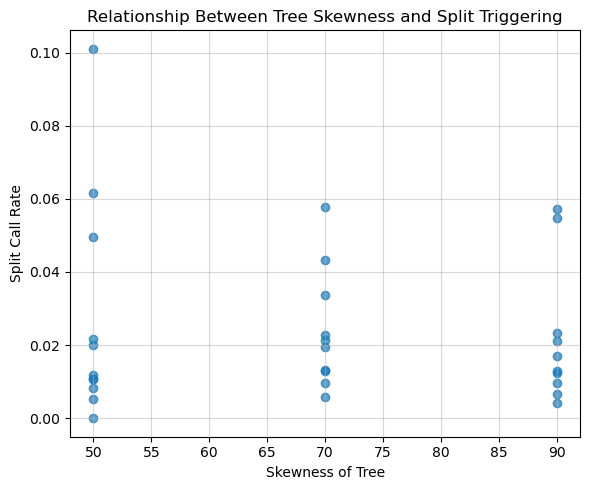

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load merged results with skewness ---
file_path = "merged_results.txt"  # adjust path if needed
df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    engine="python",
    comment="#",
    names=[
        "k",
        "sd_recursions",
        "split_calls",
        "split_committed",
        "decomp_calls",
        "decomp_committed",
        "chen_recursions",
        "skewness"
    ]
)

# --- Derive useful metrics ---
df["split_call_rate"] = df["split_calls"] / df["sd_recursions"].replace(0, np.nan)
df["split_commit_rate"] = df["split_committed"] / df["split_calls"].replace(0, np.nan)
df["recursion_savings_vs_chen"] = 1 - (df["sd_recursions"] / df["chen_recursions"].replace(0, np.nan))

print(df.head())


# Correlation
corr_split_skew = df[["skewness", "split_call_rate"]].corr().iloc[0, 1]
print(f"Correlation (Skewness vs Split Call Rate): {corr_split_skew:.4f}")

# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(df["skewness"], df["split_call_rate"], alpha=0.7)
plt.xlabel("Skewness of Tree")
plt.ylabel("Split Call Rate")
plt.title("Relationship Between Tree Skewness and Split Triggering")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


Correlation (Skewness vs Chen Recursions): -0.0893


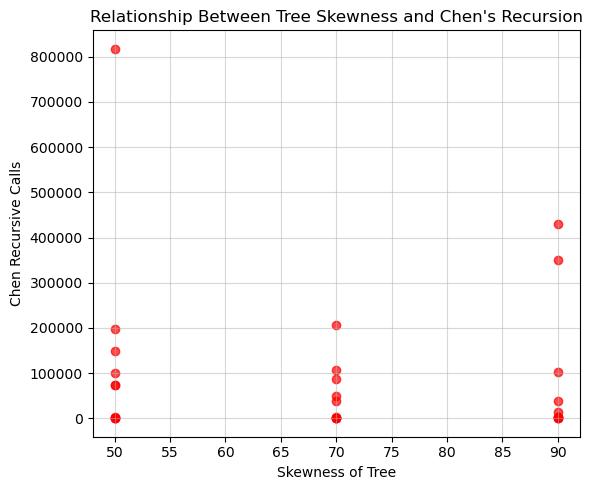

In [12]:
# Correlation
corr_skew_chen = df[["skewness", "chen_recursions"]].corr().iloc[0, 1]
print(f"Correlation (Skewness vs Chen Recursions): {corr_skew_chen:.4f}")

# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(df["skewness"], df["chen_recursions"], alpha=0.7, color="red")
plt.xlabel("Skewness of Tree")
plt.ylabel("Chen Recursive Calls")
plt.title("Relationship Between Tree Skewness and Chen's Recursion")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


🔹 Correlation (Taxa vs Split Calls): -0.0026
🔹 Correlation (Taxa vs SD Recursions): 0.1815
🔹 Correlation (Taxa vs Chen Recursions): 0.1521


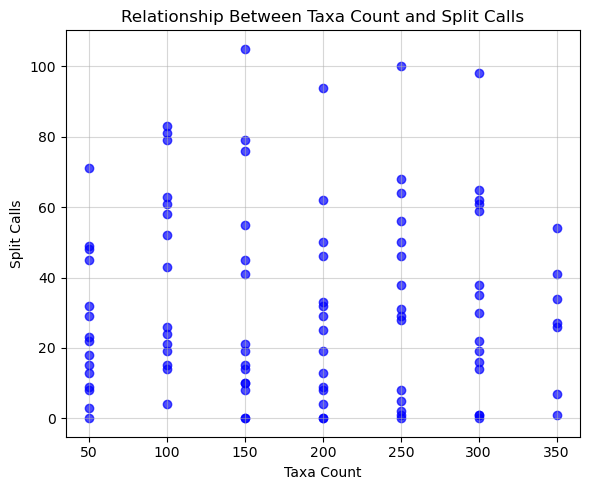

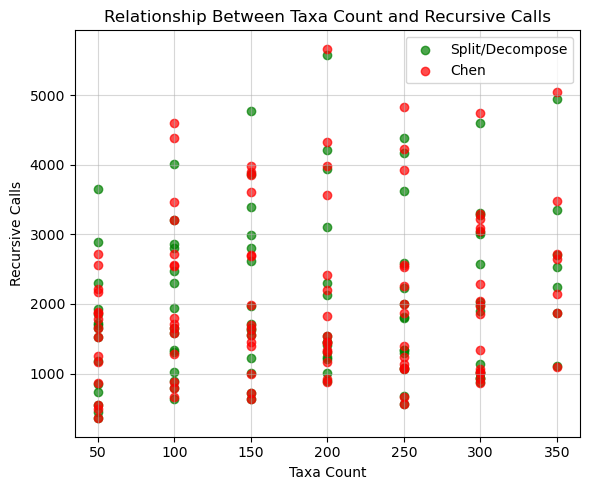

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load taxa results file ---
file_path = "fifth.txt"   # change to your file path
df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    engine="python",
    comment="#",
    names=[
        "k",
        "sd_recursions",
        "split_calls",
        "split_committed",
        "decomp_calls",
        "decomp_committed",
        "chen_recursions",
        "taxa_count"
    ]
)

# --- Derive useful ratios ---
df["split_call_rate"] = df["split_calls"] / df["sd_recursions"].replace(0, np.nan)
df["recursion_savings_vs_chen"] = 1 - (df["sd_recursions"] / df["chen_recursions"].replace(0, np.nan))

# --- Correlations ---
corr_split_taxa = df[["taxa_count", "split_calls"]].corr().iloc[0, 1]
corr_recursions_taxa = df[["taxa_count", "sd_recursions"]].corr().iloc[0, 1]
corr_chen_taxa = df[["taxa_count", "chen_recursions"]].corr().iloc[0, 1]

print(f"🔹 Correlation (Taxa vs Split Calls): {corr_split_taxa:.4f}")
print(f"🔹 Correlation (Taxa vs SD Recursions): {corr_recursions_taxa:.4f}")
print(f"🔹 Correlation (Taxa vs Chen Recursions): {corr_chen_taxa:.4f}")

# --- Scatter: Split Calls vs Taxa Count ---
plt.figure(figsize=(6,5))
plt.scatter(df["taxa_count"], df["split_calls"], alpha=0.7, color="blue")
plt.xlabel("Taxa Count")
plt.ylabel("Split Calls")
plt.title("Relationship Between Taxa Count and Split Calls")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# --- Scatter: Recursive Calls vs Taxa Count ---
plt.figure(figsize=(6,5))
plt.scatter(df["taxa_count"], df["sd_recursions"], alpha=0.7, label="Split/Decompose", color="green")
plt.scatter(df["taxa_count"], df["chen_recursions"], alpha=0.7, label="Chen", color="red")
plt.xlabel("Taxa Count")
plt.ylabel("Recursive Calls")
plt.title("Relationship Between Taxa Count and Recursive Calls")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


🔹 Average Split Call Rate: 0.0237 (2.37%)
🔹 Average Split Commit Rate: 0.0313 (3.13%)
🔹 Average Recursion Savings vs Chen: 0.1090 (10.90%)


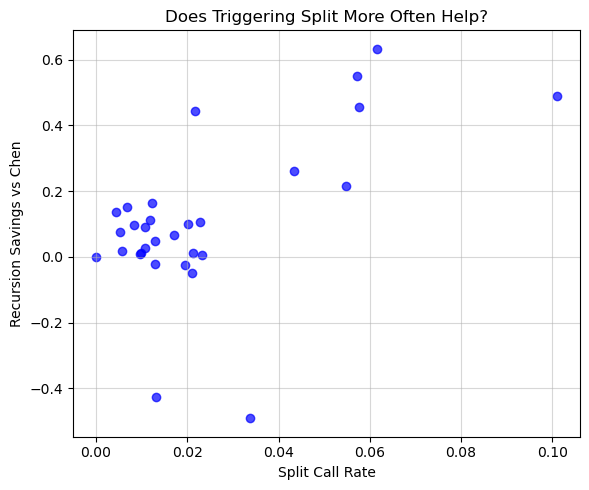

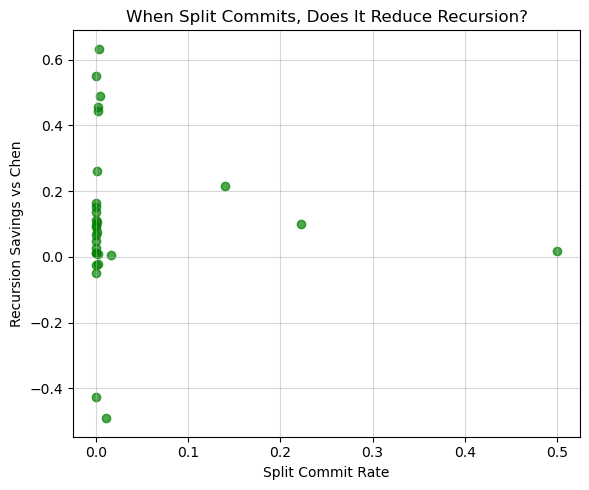

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your data ---
file_path = "merged_results.txt"  # update path if needed
df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    engine="python",
    comment="#",
    names=[
        "k",
        "sd_recursions",
        "split_calls",
        "split_committed",
        "decomp_calls",
        "decomp_committed",
        "chen_recursions",
        "topology"
    ]
)

# --- Metrics ---
df["split_call_rate"] = df["split_calls"] / df["sd_recursions"].replace(0, np.nan)
df["split_commit_rate"] = df["split_committed"] / df["split_calls"].replace(0, np.nan)

df["recursion_savings_vs_chen"] = 1 - (df["sd_recursions"] / df["chen_recursions"].replace(0, np.nan))

# --- Overall averages ---
avg_call_rate = df["split_call_rate"].mean(skipna=True)
avg_commit_rate = df["split_commit_rate"].mean(skipna=True)
avg_savings = df["recursion_savings_vs_chen"].mean(skipna=True)

print(f"🔹 Average Split Call Rate: {avg_call_rate:.4f} ({avg_call_rate*100:.2f}%)")
print(f"🔹 Average Split Commit Rate: {avg_commit_rate:.4f} ({avg_commit_rate*100:.2f}%)")
print(f"🔹 Average Recursion Savings vs Chen: {avg_savings:.4f} ({avg_savings*100:.2f}%)")

# --- Scatter: Split Call Rate vs Savings ---
plt.figure(figsize=(6,5))
plt.scatter(df["split_call_rate"], df["recursion_savings_vs_chen"], alpha=0.7, color="blue")
plt.xlabel("Split Call Rate")
plt.ylabel("Recursion Savings vs Chen")
plt.title("Does Triggering Split More Often Help?")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# --- Scatter: Split Commit Rate vs Savings ---
plt.figure(figsize=(6,5))
plt.scatter(df["split_commit_rate"], df["recursion_savings_vs_chen"], alpha=0.7, color="green")
plt.xlabel("Split Commit Rate")
plt.ylabel("Recursion Savings vs Chen")
plt.title("When Split Commits, Does It Reduce Recursion?")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


    k  split_call_rate  split_commit_rate  recursion_savings_vs_chen
0   4         0.012548           0.240741                   0.076744
1   5         0.017655           0.014170                   0.004052
2   8         0.004272           0.000000                   0.135858
3   9         0.023994           0.001265                   0.166638
4  10         0.041282           0.002934                   0.241260


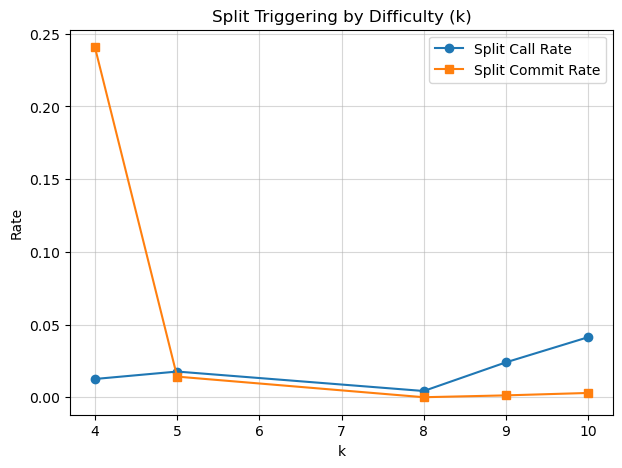

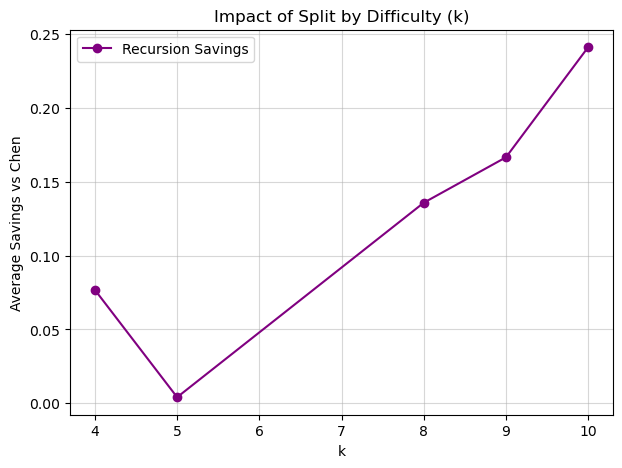

In [26]:
# Group by k to see trends
by_k = df.groupby("k")[["split_call_rate", "split_commit_rate", "recursion_savings_vs_chen"]].mean().reset_index()

print(by_k)

# Plot
plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["split_call_rate"], marker="o", label="Split Call Rate")
plt.plot(by_k["k"], by_k["split_commit_rate"], marker="s", label="Split Commit Rate")
plt.xlabel("k")
plt.ylabel("Rate")
plt.title("Split Triggering by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["recursion_savings_vs_chen"], marker="o", color="purple", label="Recursion Savings")
plt.xlabel("k")
plt.ylabel("Average Savings vs Chen")
plt.title("Impact of Split by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


In [31]:
# Group by k to see trends
by_k = df.groupby("k")[["decomp_calls", "decomp_committed", "recursion_savings_vs_chen"]].mean().reset_index()

print(by_k)

df["decomp_call_rate"] = df["decomp_calls"] / df["sd_recursions"].replace(0, np.nan)
df["decomp_commit_rate"] = df["decomp_committed"] / df["decomp_calls"].replace(0, np.nan)

# Plot
plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["decomp_call_rate"], marker="o", label="decomp Call Rate")
plt.plot(by_k["k"], by_k["decomp_commit_rate"], marker="s", label="decomp Commit Rate")
plt.xlabel("k")
plt.ylabel("Rate")
plt.title("Decomp Triggering by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["recursion_savings_vs_chen"], marker="o", color="purple", label="Recursion Savings")
plt.xlabel("k")
plt.ylabel("Average Savings vs Chen")
plt.title("Impact of Decomp by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


    k  decomp_calls  decomp_committed  recursion_savings_vs_chen
0   4      7.666667          3.000000                   0.076744
1   5     39.916667          0.333333                   0.004052
2   8    159.000000          1.000000                   0.135858
3   9   1064.142857          0.285714                   0.166638
4  10   3308.571429         10.571429                   0.241260


KeyError: 'decomp_call_rate'

<Figure size 700x500 with 0 Axes>

   k  sd_recursions  split_calls  split_committed  decomp_calls  \
0  5           1701           14                0            16   
1  5           1977           21                0             2   
2  4            447            9                2            12   
3  5            541            0                0             9   
4  4            762            9                0             9   

   decomp_committed  chen_recursions  skewness  decomp_call_rate  \
0                 0             1881        50          0.009406   
1                 2             2176        50          0.001012   
2                 8              496        50          0.026846   
3                 0              541        50          0.016636   
4                 1              858        50          0.011811   

   decomp_commit_rate  recursion_savings_vs_chen  
0            0.000000                   0.095694  
1            1.000000                   0.091452  
2            0.666667              

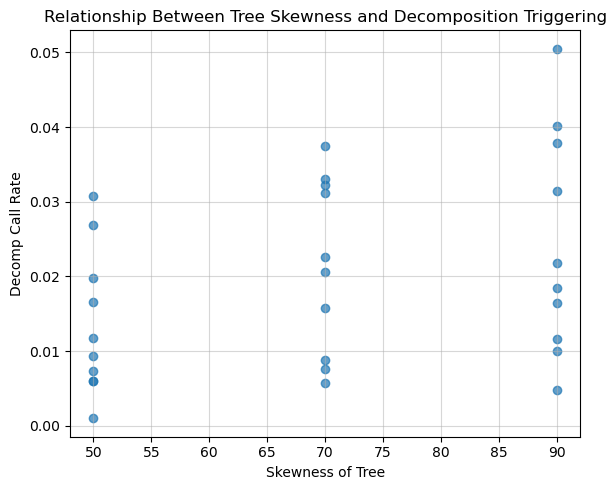

Correlation (Decomp Call Rate vs Recursion Savings): -0.0881


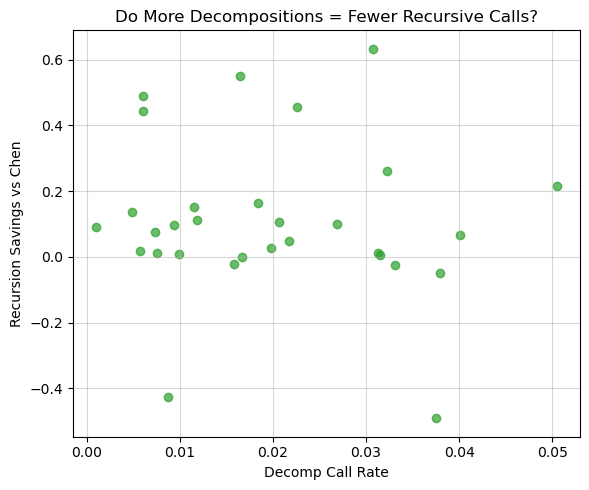

    k  decomp_call_rate  decomp_commit_rate  recursion_savings_vs_chen
0   4          0.014785            0.259259                   0.076744
1   5          0.024128            0.085768                   0.004052
2   8          0.004852            0.006289                   0.135858
3   9          0.020104            0.000216                   0.166638
4  10          0.016329            0.002663                   0.241260


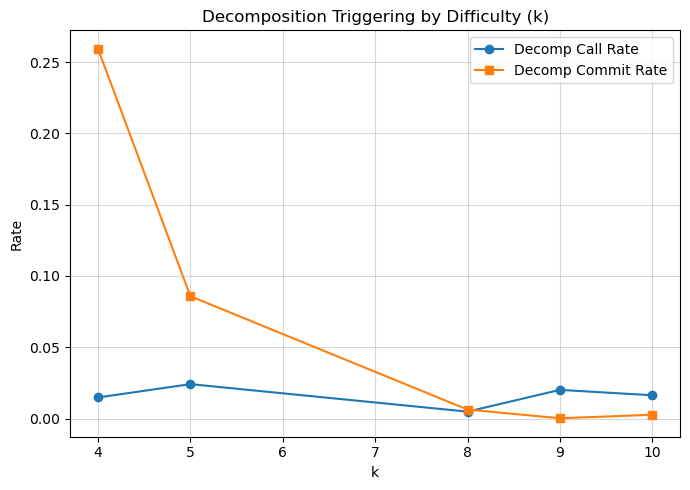

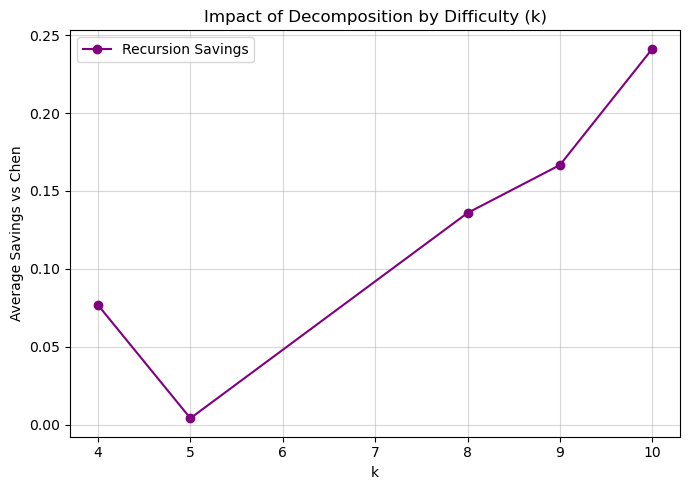

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load merged results with skewness ---
file_path = "merged_results.txt"  # adjust path if needed
df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    engine="python",
    comment="#",
    names=[
        "k",
        "sd_recursions",
        "split_calls",
        "split_committed",
        "decomp_calls",
        "decomp_committed",
        "chen_recursions",
        "skewness"
    ]
)

# --- Derived metrics (decomposition-focused) ---
df["decomp_call_rate"]   = df["decomp_calls"] / df["sd_recursions"].replace(0, np.nan)
df["decomp_commit_rate"] = df["decomp_committed"] / df["decomp_calls"].replace(0, np.nan)
df["recursion_savings_vs_chen"] = 1 - (df["sd_recursions"] / df["chen_recursions"].replace(0, np.nan))

print(df.head())

# --- Relationship 1: Skewness vs Decomposition Triggering ---
corr_decomp_skew = df[["skewness", "decomp_call_rate"]].corr().iloc[0, 1]
print(f"Correlation (Skewness vs Decomp Call Rate): {corr_decomp_skew:.4f}")

plt.figure(figsize=(6,5))
plt.scatter(df["skewness"], df["decomp_call_rate"], alpha=0.7)
plt.xlabel("Skewness of Tree")
plt.ylabel("Decomp Call Rate")
plt.title("Relationship Between Tree Skewness and Decomposition Triggering")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# --- Relationship 2: Does more decompose correlate with savings? ---
corr_decomp_savings = df[["decomp_call_rate", "recursion_savings_vs_chen"]].corr().iloc[0, 1]
print(f"Correlation (Decomp Call Rate vs Recursion Savings): {corr_decomp_savings:.4f}")

plt.figure(figsize=(6,5))
plt.scatter(df["decomp_call_rate"], df["recursion_savings_vs_chen"], alpha=0.7, color="tab:green")
plt.xlabel("Decomp Call Rate")
plt.ylabel("Recursion Savings vs Chen")
plt.title("Do More Decompositions = Fewer Recursive Calls?")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# --- Trends by difficulty (k) ---
by_k = df.groupby("k")[["decomp_call_rate", "decomp_commit_rate", "recursion_savings_vs_chen"]].mean().reset_index()
print(by_k)

plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["decomp_call_rate"],   marker="o", label="Decomp Call Rate")
plt.plot(by_k["k"], by_k["decomp_commit_rate"], marker="s", label="Decomp Commit Rate")
plt.xlabel("k")
plt.ylabel("Rate")
plt.title("Decomposition Triggering by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["recursion_savings_vs_chen"], marker="o", color="purple", label="Recursion Savings")
plt.xlabel("k")
plt.ylabel("Average Savings vs Chen")
plt.title("Impact of Decomposition by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()
